In [210]:
"""
------------------------------------------------------------------------------
About

Script to check if there is new registered data on christmas markets in Berlin. 
The new data is saved as new_data.xlsx
------------------------------------------------------------------------------
"""



'\n------------------------------------------------------------------------------\nAbout\n------------------------------------------------------------------------------\n'

In [211]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import requests
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import time

import re
from datetime import datetime

In [212]:
#import data
old_data = pd.read_excel("markets_editedByHand.xlsx") #edited markets

old_data.head()

,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,183,Smash Burger,NaN,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,NaN,NaN,/,/,NaN,52.5191,13.4086,1,0,0,0,0,1,"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)",placeholder.png,placeholder
1,60,Winterzauber Weihnachtsmarkt,NaN,Möllhausenufer 30,Treptow-Köpenick,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,NaN,NaN,https://strandbad-wendenschloss.berlin,/,NaN,52.4152,13.6002,0,0,0,0,0,0,NaN,Winterzauber_im_Advent.jpg,Copyright: Kira Hofmann
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,NaN,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,NaN,NaN,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",NaN,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),placeholder.png,placeholder
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,NaN,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,NaN,NaN,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",NaN,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),placeholder.png,placeholder
4,102,Adventsökomarkt der Grünen Liga,NaN,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,NaN,NaN,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",NaN,52.5366,13.4175,0,0,0,0,0,0,NaN,placeholder.png,placeholder


In [213]:
"""
------------------------------------------------------------------------------
Function
- fetch data from url
------------------------------------------------------------------------------
"""

def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()  #convert to json
        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None


In [214]:
#Xmas Data
url = "https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.geojson?q="

xmasData = fetch_data(url)
print(xmasData)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.4086, 52.5191]}, 'properties': {'title': '183', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'description': '52,5191<br>13,4086<br> <a href="/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183">Mehr...</a>', 'id': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'data': {'id': 183, 'bezirk': 'Mitte', 'name': 'Smash Burger', 'strasse': 'Landsberger Allee, Rotes Rathaus, Alexander Platz', 'plz': '', 'von': '01.11.2024', 'bis': '28.12.2024', 'veranstalter': 'Mr. Smash Burger', 'oeffnungszeiten': '14:00 Uhr bis 23:00 Uhr', 'email': 'vivien-selimi@gmx.de', 'w3': '/', 'bemerkungen': '/'}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.6002, 52.4152]}, 'properties': {'title': '60', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/60', 'description': '52,415

In [215]:
list = []

for feature in xmasData["features"]:
    #data
    data = feature["properties"]["data"]

    #geometry
    coordinates = feature["geometry"]["coordinates"]

    #add coordinates to data
    data["lng"] = coordinates[0]
    data["lat"] = coordinates[1]


    list.append(data)

new_data = pd.DataFrame(list)


pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

new_data.head()

,id,bezirk,name,strasse,plz,von,bis,veranstalter,oeffnungszeiten,email,w3,bemerkungen,lng,lat
0,183,Mitte,Smash Burger,"Landsberger Allee, Rotes Rathaus, Alexander Platz",,01.11.2024,28.12.2024,Mr. Smash Burger,14:00 Uhr bis 23:00 Uhr,vivien-selimi@gmx.de,/,/,13.4086,52.5191
1,60,Treptow-Köpenick,Winterzauber Weihnachtsmarkt,Möllhausenufer 30,12555,01.11.2024,31.12.2024,Strandbad Wendenschloss GmbH,12:00 - 20:00 Uhr,info@strandbad-wendenschloss.berlin,https://strandbad-wendenschloss.berlin,/,13.6002,52.4152
2,63,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,01.12. / 15.12. / 22.12.2024,,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
3,66,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,08.12.2024,08.12.2024,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
4,102,Pankow,Adventsökomarkt der Grünen Liga,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,10405,01.12.2024,01.12.2024,GRÜNE LIGA Berlin,12:00 - 19:00 Uhr,oekomarkt.kollwitzplatz@grueneliga-berlin.de,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",13.4175,52.5366


In [216]:
print(type(new_data))

<class 'pandas.core.frame.DataFrame'>


In [217]:
print(type(old_data))

<class 'pandas.core.frame.DataFrame'>


In [218]:
"""
------------------------------------------------------------------------------
Compare old_data with new_data
------------------------------------------------------------------------------
"""


if len(old_data) > 0: 
    #identify existing data by id
    new_data = new_data[~new_data["id"].isin(old_data["id"])]

if len(new_data) > 0: 
    new_data.to_csv("new_Data.xlsx", index=False)

    #load new data
    loaded_data = pd.read_csv("new_Data.xlsx")
    print(loaded_data)
else:
    print("Keine neuen Daten.")



     id                      bezirk                                                     name                                          strasse    plz                                                                               von         bis                                                                 veranstalter                                                                                                                                                                  oeffnungszeiten                                    email                                                                                  w3                                                                                                                                                                                                                                                                                                                                                                                           

In [219]:
len(new_data)

13

In [220]:
#add new empty columns "shortname", "plz_ort", "train", "von", "bis", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"

loaded_data["shortname"] = None
loaded_data["plz_ort"] = None
loaded_data["Mo"] = None
loaded_data["Di"] = None
loaded_data["Mi"] = None
loaded_data["Do"] = None
loaded_data["Fr"] = None
loaded_data["Sa"] = None
loaded_data["So"] = None
loaded_data["closed-exc"] = None
loaded_data["hours-exc"] = None
loaded_data["ignore"] = 0
loaded_data["immer-kostenlos"] = 0
loaded_data["international"] = 0
loaded_data["barrierefrei"] = 0
loaded_data["action"] = 0
loaded_data["short_distance"] = 0
loaded_data["bemerkungen_en"] = None

#new order of data frame columns
loaded_data = loaded_data[["id","name", "shortname", "strasse", "bezirk", "plz", "plz_ort", "von", "bis", "oeffnungszeiten", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "lat", "lng", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"]]

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,None,25.11.2024,22.12.2024,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,None,25.11.2024,22.12.2024,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,None,25.11.2024,29.12.2024,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinarischen Köstlichkeiten passend zur Weihnachtszeit.",None,52.5199,13.2933,0,0,0,0,0,0
3,174,Weihnachtsmarkt an der Kaiser-Wilhelm-Gedächtniskirche,None,Breitscheidplatz,Charlottenburg-Wilmersdorf,10719,None,25

In [221]:
#column "ort"
loaded_data["bezirk"].unique()

list_bez = ['Mitte', 'Treptow-Köpenick', 'Steglitz-Zehlendorf', 'Pankow',
       'Spandau', 'Reinickendorf', 'Tempelhof-Schöneberg',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf', 'Potsdam',
       'Friedrichshain-Kreuzberg', 'Neukölln']

loaded_data["ort"] = "Berlin"

loaded_data.loc[~loaded_data["bezirk"].isin(list_bez), "ort"] = None

In [222]:
#combined column "plz_ort" as str
loaded_data["plz_ort"] = loaded_data["plz"].astype(str) + " " + loaded_data["ort"]
loaded_data["plz_ort"].astype(str)

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.2024,22.12.2024,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,10435 Berlin,25.11.2024,22.12.2024,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,Berlin
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,14059 Berlin,25.11.2024,29.12.2024,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinarischen Köstlichkeiten passend zur Weihnachtszeit.",None,52.5199,13.2933,0,0,0,0,0,0,Berlin
3,174,Weihnachtsmarkt an der Kaiser-Wilhelm-Gedächtniskirche,None,Breitsch

In [223]:
"""
------------------------------------------------------------------------------
date time
------------------------------------------------------------------------------
"""

def convert_to_datetime(date_str):
    try:
        #convert in datetime if possible
        date = pd.to_datetime(date_str, format="%d.%m.%Y", dayfirst=True, errors="raise")
        return date
    except (ValueError, TypeError):
        #if error occurs keep original date str
        print(f"Error in conversion: {date_str}") 
        return date_str

#convert to datetime
loaded_data["von"] = loaded_data["von"].apply(convert_to_datetime)
loaded_data["bis"] = loaded_data["bis"].apply(convert_to_datetime)

loaded_data.head()

Error in conversion: 30.11. bis 01.12. / 07.12. bis 08.12. / 14.12. bis 15.12.  21.12. bis 22.12.2024


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,2024-11-25 00:00:00,2024-12-22,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,10435 Berlin,2024-11-25 00:00:00,2024-12-22,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,Berlin
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,14059 Berlin,2024-11-25 00:00:00,2024-12-29,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinarischen Köstlichkeiten passend zur Weihnachtszeit.",None,52.5199,13.2933,0,0,0,0,0,0,Berlin
3,174,Weihnachtsmarkt an der Kaiser-Wilhelm-Ged

In [224]:
#fill empty strings in "bis" with NA
loaded_data["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)
print(loaded_data["bis"].isna().sum())

1


/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_2588/3596461357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loaded_data["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)


In [225]:
#fill NAs in "bis" with value from "von"
loaded_data["bis"] = loaded_data["bis"].fillna(loaded_data["von"])

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,2024-11-25 00:00:00,2024-12-22 00:00:00,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,10435 Berlin,2024-11-25 00:00:00,2024-12-22 00:00:00,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,Berlin
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,14059 Berlin,2024-11-25 00:00:00,2024-12-29 00:00:00,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinarischen Köstlichkeiten passend zur Weihnachtszeit.",None,52.5199,13.2933,0,0,0,0,0,0,Berlin
3,174,Weihnachtsmark

In [226]:
def mark_weekdays(row):
    #check valid dates
    von_date = row["von"]
    bis_date = row["bis"]

    print(f"Curent values: von = {von_date}, bis = {bis_date}")

    #if dates are valid create date range
    if isinstance(von_date, pd.Timestamp) and isinstance(bis_date, pd.Timestamp):
        date_range = pd.date_range(von_date, bis_date)

        #print date range
        print(f"Date range: {date_range}")

        #insert 1 if weekday is in date range 
        weekdays = {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"}
        for day_num, day_name in weekdays.items():
            row[day_name] = 1 if any(d.weekday() == day_num for d in date_range) else 0
    else:
        #insert 0 if dates are invalid
        for day_name in ["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]:
            row[day_name] = 0

    return row

#apply to each row
loaded_data = loaded_data.apply(mark_weekdays, axis=1)

loaded_data.head()

Curent values: von = 2024-11-25 00:00:00, bis = 2024-12-22 00:00:00
Date range: DatetimeIndex(['2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02',
               '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06',
               '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10',
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14',
               '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22'],
              dtype='datetime64[ns]', freq='D')
Curent values: von = 2024-11-25 00:00:00, bis = 2024-12-22 00:00:00
Date range: DatetimeIndex(['2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02',
               '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06',
               '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10',
          

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,2024-11-25 00:00:00,2024-12-22 00:00:00,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,1,1,1,1,1,1,1,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,10435 Berlin,2024-11-25 00:00:00,2024-12-22 00:00:00,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,1,1,1,1,1,1,1,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,Berlin
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,14059 Berlin,2024-11-25 00:00:00,2024-12-29 00:00:00,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,1,1,1,1,1,1,1,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinarischen Köstlichkeiten passend zur Weihnachtszeit.",None,52.5199,13.2933,0,0,0,0,0,0,Berlin
3,174,Weihnachtsmarkt an der Kaiser-Wilhelm-Gedächtniskirche,None,Breitscheidplatz,

In [227]:
#only date no time in columns "von" and "bis"

def convert_date(date):
    try:
        #to datetime
        date = pd.to_datetime(date, format="%d.%m.%Y %H:%M", errors="raise")
        return date.strftime("%d.%m.%y")   #only return date
    except (ValueError, TypeError):
        #return original value
        return date

loaded_data["von"] = loaded_data["von"].apply(convert_date)
loaded_data["bis"] = loaded_data["bis"].apply(convert_date)

In [228]:
"""
------------------------------------------------------------------------------
opening hours
------------------------------------------------------------------------------
"""


def convertOpeningHours(oeffnungszeiten):
    #delete "Uhr" and blank spaces
    cleaned = oeffnungszeiten.strip().replace("Uhr", "").replace("uhr", "").replace("bis", "-").replace(" ", "")
    cleaned = cleaned.replace(".", ":")

    #Regex for recognising the time formats HH:MM-HH:MM oder HH-HH
    pattern = r'(\d{1,2}:\d{2})\s*-\s*(\d{1,2}:\d{2})|(\d{1,2})\s*-\s*(\d{1,2})'
    
    #search for pattern
    match = re.search(pattern, cleaned)
    
    if match:
        
        #if HH:MM is found
        if match.group(1) and match.group(2):
            start_time = match.group(1)
            end_time = match.group(2)
        #if HH-HH is found
        elif match.group(3) and match.group(4):
            start_hour = match.group(3)
            end_hour = match.group(4)
            start_time = f"{start_hour}:00" 
            end_time = f"{end_hour}:00"
        else:
            #if format deviates, keep original "oeffnungszeiten"
            return None 
        
        #check 24-hour-format
        start_hour, start_minute = map(int, start_time.split(":"))
        end_hour, end_minute = map(int, end_time.split(":"))

        if (0 <= start_hour < 24) and (0 <= end_hour < 24):
            return f"{start_time}-{end_time}"


#apply function on column "oeffnungszeiten"
loaded_data["formatierteOeffnungszeit"] = loaded_data["oeffnungszeiten"].apply(convertOpeningHours)

len(loaded_data)

13

In [229]:
#add formatted opening hour to weekdays == 1
for day in loaded_data[["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]]:
    loaded_data[day] = loaded_data[day].mask(loaded_data[day] == 1, loaded_data["formatierteOeffnungszeit"])

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin,11:00-20:00
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435,10435 Berlin,25.11.24,22.12.24,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,Berlin,15:00-22:00
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059,14059 Berlin,25.11.24,29.12.24,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große

In [230]:
loaded_data.dtypes

id                            int64
name                         object
shortname                    object
strasse                      object
bezirk                       object
plz                           int64
plz_ort                      object
von                          object
bis                          object
oeffnungszeiten              object
Mo                           object
Di                           object
Mi                           object
Do                           object
Fr                           object
Sa                           object
So                           object
closed-exc                   object
hours-exc                    object
w3                           object
bemerkungen                  object
bemerkungen_en               object
lat                         float64
lng                         float64
ignore                        int64
immer-kostenlos               int64
international                 int64
barrierefrei                

In [231]:
"""
------------------------------------------------------------------------------
clean text: bemerkungen
------------------------------------------------------------------------------
"""

#clean text
def clean_text(text):
    #text as str
    text = str(text)
    #remove special characters
    text = re.sub(r'[^\w\s:,-]', '', text)
    #lower case
    text = text.lower().strip()
    return text

In [232]:
#clean "bemerkenungen"
loaded_data["cleanedBemerkungen"] = loaded_data["bemerkungen"].apply(clean_text)

In [233]:
"""
------------------------------------------------------------------------------
accessability
------------------------------------------------------------------------------
"""

#search for kexwords related to "barrierefrei" in cleanedBemerkungen
keywords = ["barrierefrei", "rollstuhlgerecht", "zugänglich", "barrierearm"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
loaded_data["barrierefrei"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

loaded_data.head()

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_2588/2351178130.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  loaded_data["barrierefrei"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin,11:00-20:00,"hier ist weihnachten zu hause im advent wird die spandauer altstadt wieder vom duft gebrannter mandeln, gegrillter bratwurst und köstlichem glühwein durchzogen kinderaugen strahlen beim anblick bunter zuckerwatte und die herzen schlagen schneller bei jung und alt, wenn sie dem weihnachtsmann begegnen\n vom rathaus spandau bis zur kirche st nikolai, sowie auf dem marktplatz bieten kunsthandwerker und händler ihre waren zum stöbern, staunen und natürlich zum verkauf an auf dem südlichen teil des reformationsplatzes an der kirche st nikolai findet wieder der beliebte mittelalterliche teil des weihnachtsmarktes seinen platz\n in berlins größter zusammenhängenden fußgängerzone mit seinen fast 120 einzelhandelsgeschäften und drei kaufhäusern, sowie den spandau arcaden, die fußläufig nur wenige minuten entfernt sind, lässt sich der weihnachtsmarktbesuch vortrefflich mit der suche nach den schönsten überraschungen zum weihnachtsfest für die lieben kombinieren\nverkehrstechnisch ist der spandauer weihnachtsmarkt hervorragend angebunden zwischen den beiden u-bahnhöfen altstadt spandau und rathaus spandau der linie 7 gelegen, in unmittelbarer nähe des fern- und regionalbahnhofs spandau mit den anschlüssen der s-bahn, regional- und fernbahn, sowie unterschiedlichsten buslinien, findet jeder besucher seine optimale verbindung mit dem öpnv und wer doch nicht auf das eigene fahrzeug verzichten möchte, der hat die freie wahl bei fast 5000 stellplätzen auf

In [234]:
#result barrierefrei
loaded_data[loaded_data["barrierefrei"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen


In [235]:
"""
------------------------------------------------------------------------------
free entry
------------------------------------------------------------------------------
"""

#search for kexwords "Entritt frei" in cleanedBemerkungen
keywords = ["eintritt frei", "freier eintritt", "ohne eintritt", "eintritt kostenlos", "kostenlos", "eintritt kostenfrei", "kostenfrei"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
loaded_data["immer-kostenlos"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

loaded_data.head()

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_2588/3047966936.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  loaded_data["immer-kostenlos"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin,11:00-20:00,"hier ist weihnachten zu hause im advent wird die spandauer altstadt wieder vom duft gebrannter mandeln, gegrillter bratwurst und köstlichem glühwein durchzogen kinderaugen strahlen beim anblick bunter zuckerwatte und die herzen schlagen schneller bei jung und alt, wenn sie dem weihnachtsmann begegnen\n vom rathaus spandau bis zur kirche st nikolai, sowie auf dem marktplatz bieten kunsthandwerker und händler ihre waren zum stöbern, staunen und natürlich zum verkauf an auf dem südlichen teil des reformationsplatzes an der kirche st nikolai findet wieder der beliebte mittelalterliche teil des weihnachtsmarktes seinen platz\n in berlins größter zusammenhängenden fußgängerzone mit seinen fast 120 einzelhandelsgeschäften und drei kaufhäusern, sowie den spandau arcaden, die fußläufig nur wenige minuten entfernt sind, lässt sich der weihnachtsmarktbesuch vortrefflich mit der suche nach den schönsten überraschungen zum weihnachtsfest für die lieben kombinieren\nverkehrstechnisch ist der spandauer weihnachtsmarkt hervorragend angebunden zwischen den beiden u-bahnhöfen altstadt spandau und rathaus spandau der linie 7 gelegen, in unmittelbarer nähe des fern- und regionalbahnhofs spandau mit den anschlüssen der s-bahn, regional- und fernbahn, sowie unterschiedlichsten buslinien, findet jeder besucher seine optimale verbindung mit dem öpnv und wer doch nicht auf das eigene fahrzeug verzichten möchte, der hat die freie wahl bei fast 5000 stellplätzen auf

In [236]:
"""
------------------------------------------------------------------------------
info train / short distance
------------------------------------------------------------------------------
"""

gdf_vbb = gpd.read_file("gdf_vbb.geojson")

In [237]:
"""
------------------------------------------------------------------------------
convert df in geodataframe / geometry_400 = lng lat + buffer 500m
------------------------------------------------------------------------------
"""

loaded_data["geometry"] = loaded_data.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)

gdf = gpd.GeoDataFrame(loaded_data, geometry="geometry")

gdf.set_crs(epsg=4326, inplace=True)

gdf = gdf.to_crs(epsg=25832)

<Axes: >

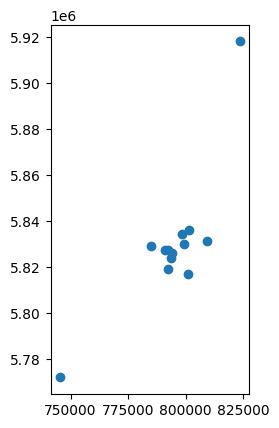

In [238]:
gdf.plot()

In [239]:
#buffer 400m
gdf["geometry_400"] = gdf.geometry.buffer(400)
gdf = gdf.set_geometry("geometry_400")

In [240]:
#intersection
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False) 

result = gpd.sjoin(gdf, gdf_vbb, predicate="intersects")

print(result)

     id                                                     name shortname              strasse                      bezirk    plz       plz_ort       von       bis                                                                                                                                                                  oeffnungszeiten           Mo           Di           Mi           Do           Fr           Sa           So closed-exc hours-exc                                                                                  w3                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [241]:
#group by name
result_grouped = (
    result.groupby("name")["Bauwerk Name"] 
    .agg(lambda x: ', '.join(x.unique())) #all results in one column
    .reset_index() 
)
result_grouped.head()

,name,Bauwerk Name
0,Adventsmarkt im Rathaus Charlottenburg,U Richard-Wagner-Platz (Berlin)
1,Schwedischer Weihnachtsbasar,U Berliner Str. (Berlin)
2,Spandauer Weihnachtsmarkt,"S+U Rathaus Spandau (Berlin), U Altstadt Spandau (Berlin)"
3,Weihnachtsmarkt an der Kaiser-Wilhelm-Gedächtniskirche,"U Kurfürstendamm (Berlin), S+U Zoologischer Garten Bhf (Berlin)"
4,„Bunt in eine besinnliche Zeit – Wir leben Weihnachten“,S Blankenburg (Berlin)


In [242]:
#add info from intersection to gdf

#merge
gdf = gdf.merge(result_grouped, on="name", how="left")

gdf = gdf.drop(columns=["geometry_400"])
gdf = gdf.set_geometry("geometry")

gdf.head()


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,0,Berlin,11:00-20:00,"hier ist weihnachten zu hause im advent wird die spandauer altstadt wieder vom duft gebrannter mandeln, gegrillter bratwurst und köstlichem glühwein durchzogen kinderaugen strahlen beim anblick bunter zuckerwatte und die herzen schlagen schneller bei jung und alt, wenn sie dem weihnachtsmann begegnen\n vom rathaus spandau bis zur kirche st nikolai, sowie auf dem marktplatz bieten kunsthandwerker und händler ihre waren zum stöbern, staunen und natürlich zum verkauf an auf dem südlichen teil des reformationsplatzes an der kirche st nikolai findet wieder der beliebte mittelalterliche teil des weihnachtsmarktes seinen platz\n in berlins größter zusammenhängenden fußgängerzone mit seinen fast 120 einzelhandelsgeschäften und drei kaufhäusern, sowie den spandau arcaden, die fußläufig nur wenige minuten entfernt sind, lässt sich der weihnachtsmarktbesuch vortrefflich mit der suche nach den schönsten überraschungen zum weihnachtsfest für die lieben kombinieren\nverkehrstechnisch ist der spandauer weihnachtsmarkt hervorragend angebunden zwischen den beiden u-bahnhöfen altstadt spandau und rathaus spandau der linie 7 gelegen, in unmittelbarer nähe des fern- und regionalbahnhofs spandau mit den anschlüssen der s-bahn, regional- und fernbahn, sowie unterschiedlichsten buslinien, findet jeder besucher seine optimale verbindung mit dem öpnv und wer doch nicht auf das eigene fahrzeug verzichten möchte, der hat die freie wahl bei fast

In [243]:
#set short_distance = 1 when "Bauwerk Name" is not NA
gdf.loc[gdf["Bauwerk Name"].notna(), "short_distance"] = 1

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,1,Berlin,11:00-20:00,"hier ist weihnachten zu hause im advent wird die spandauer altstadt wieder vom duft gebrannter mandeln, gegrillter bratwurst und köstlichem glühwein durchzogen kinderaugen strahlen beim anblick bunter zuckerwatte und die herzen schlagen schneller bei jung und alt, wenn sie dem weihnachtsmann begegnen\n vom rathaus spandau bis zur kirche st nikolai, sowie auf dem marktplatz bieten kunsthandwerker und händler ihre waren zum stöbern, staunen und natürlich zum verkauf an auf dem südlichen teil des reformationsplatzes an der kirche st nikolai findet wieder der beliebte mittelalterliche teil des weihnachtsmarktes seinen platz\n in berlins größter zusammenhängenden fußgängerzone mit seinen fast 120 einzelhandelsgeschäften und drei kaufhäusern, sowie den spandau arcaden, die fußläufig nur wenige minuten entfernt sind, lässt sich der weihnachtsmarktbesuch vortrefflich mit der suche nach den schönsten überraschungen zum weihnachtsfest für die lieben kombinieren\nverkehrstechnisch ist der spandauer weihnachtsmarkt hervorragend angebunden zwischen den beiden u-bahnhöfen altstadt spandau und rathaus spandau der linie 7 gelegen, in unmittelbarer nähe des fern- und regionalbahnhofs spandau mit den anschlüssen der s-bahn, regional- und fernbahn, sowie unterschiedlichsten buslinien, findet jeder besucher seine optimale verbindung mit dem öpnv und wer doch nicht auf das eigene fahrzeug verzichten möchte, der hat die freie wahl bei fast

In [244]:
#rename column "Bauwerk Name" in "train"
gdf.rename(columns={"Bauwerk Name": "train"}, inplace = True)

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,train
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,1,Berlin,11:00-20:00,"hier ist weihnachten zu hause im advent wird die spandauer altstadt wieder vom duft gebrannter mandeln, gegrillter bratwurst und köstlichem glühwein durchzogen kinderaugen strahlen beim anblick bunter zuckerwatte und die herzen schlagen schneller bei jung und alt, wenn sie dem weihnachtsmann begegnen\n vom rathaus spandau bis zur kirche st nikolai, sowie auf dem marktplatz bieten kunsthandwerker und händler ihre waren zum stöbern, staunen und natürlich zum verkauf an auf dem südlichen teil des reformationsplatzes an der kirche st nikolai findet wieder der beliebte mittelalterliche teil des weihnachtsmarktes seinen platz\n in berlins größter zusammenhängenden fußgängerzone mit seinen fast 120 einzelhandelsgeschäften und drei kaufhäusern, sowie den spandau arcaden, die fußläufig nur wenige minuten entfernt sind, lässt sich der weihnachtsmarktbesuch vortrefflich mit der suche nach den schönsten überraschungen zum weihnachtsfest für die lieben kombinieren\nverkehrstechnisch ist der spandauer weihnachtsmarkt hervorragend angebunden zwischen den beiden u-bahnhöfen altstadt spandau und rathaus spandau der linie 7 gelegen, in unmittelbarer nähe des fern- und regionalbahnhofs spandau mit den anschlüssen der s-bahn, regional- und fernbahn, sowie unterschiedlichsten buslinien, findet jeder besucher seine optimale verbindung mit dem öpnv und wer doch nicht auf das eigene fahrzeug verzichten möchte, der hat die freie wahl bei fast 5000 s

In [245]:
#drop irrelevant columns
gdf.drop(columns=["plz", "ort", "formatierteOeffnungszeit", "cleanedBemerkungen", "geometry"], inplace = True)

gdf.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train
0,132,Spandauer Weihnachtsmarkt,None,Altstadt Spandau,Spandau,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr\nFreitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,None,None,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen.\n Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz.\n In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren.\nVerkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind.\n Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei.\n Der Spandauer Weihnachtsmarkt freut sich auf Sie!\n Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024\n Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",None,52.5375,13.2036,0,0,0,0,0,1,"S+U Rathaus Spandau (Berlin), U Altstadt Spandau (Berlin)"
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,None,Schönhauser Allee 36,Pankow,10435 Berlin,25.11.24,22.12.24,Mo-Fr 15:00 - 22:00 Uhr\nSa-So 13:00 - 22:00 Uhr,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,None,None,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,None,52.5383,13.4129,0,0,0,0,0,0,NaN
2,123,Weihnachtsmarkt am Schloss Charlottenburg,None,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059 Berlin,25.11.24,29.12.24,Mo-Do: 13:00 - 22:00 Uhr\nFr-So: 12:00 - 22:00 Uhr\nHeilig Abend geschlossen\n1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,None,None,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei.\nSeit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". \n Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltung und Kunsthandwerk sorgt für unvergessliche Momente. Es gibt schöne Geschenkideen und liebevoll Selbstgemachtes, ebenso eine große Auswahl an kulinar

In [246]:
#date types
gdf.dtypes

id                   int64
name                object
shortname           object
strasse             object
bezirk              object
plz_ort             object
von                 object
bis                 object
oeffnungszeiten     object
Mo                  object
Di                  object
Mi                  object
Do                  object
Fr                  object
Sa                  object
So                  object
closed-exc          object
hours-exc           object
w3                  object
bemerkungen         object
bemerkungen_en      object
lat                float64
lng                float64
ignore               int64
immer-kostenlos      int64
international        int64
barrierefrei         int64
action               int64
short_distance       int64
train               object
dtype: object

In [247]:
#adjust date types
gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]] = gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]].astype("string")

gdf.dtypes

id                 string[python]
name               string[python]
shortname          string[python]
strasse            string[python]
bezirk             string[python]
plz_ort            string[python]
von                string[python]
bis                string[python]
oeffnungszeiten    string[python]
Mo                 string[python]
Di                 string[python]
Mi                 string[python]
Do                 string[python]
Fr                 string[python]
Sa                 string[python]
So                 string[python]
closed-exc         string[python]
hours-exc          string[python]
w3                 string[python]
bemerkungen        string[python]
bemerkungen_en     string[python]
lat                       float64
lng                       float64
ignore             string[python]
immer-kostenlos    string[python]
international      string[python]
barrierefrei       string[python]
action             string[python]
short_distance     string[python]
train         

In [248]:
#merge with image file
images = pd.read_excel("Weihnachtsmarkt_Bilder.xlsx")
images["id"] = images["id"].astype("string")
images.drop(columns=["name"], inplace=True) 

weihnachten = gdf.merge(images, on="id", how="left")

weihnachten.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,132,Spandauer Weihnachtsmarkt,<NA>,Altstadt Spandau,Spandau,13597 Berlin,25.11.24,22.12.24,Sonntag bis Donnerstag 11:00 - 20:00 Uhr Freitag bis Samstag 11:00 - 22:00 Uhr,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,<NA>,<NA>,https://www.spandauer-weihnachtsmarkt.de,"Hier ist Weihnachten zu Hause. Im Advent wird die Spandauer Altstadt wieder vom Duft gebrannter Mandeln, gegrillter Bratwurst und köstlichem Glühwein durchzogen. Kinderaugen strahlen beim Anblick bunter Zuckerwatte und die Herzen schlagen schneller bei Jung und Alt, wenn sie dem Weihnachtsmann begegnen. Vom Rathaus Spandau bis zur Kirche St. Nikolai, sowie auf dem Marktplatz bieten Kunsthandwerker und Händler Ihre Waren zum Stöbern, Staunen und natürlich zum Verkauf an. Auf dem südlichen Teil des Reformationsplatzes an der Kirche St. Nikolai findet wieder der beliebte mittelalterliche Teil des Weihnachtsmarktes seinen Platz. In Berlins größter zusammenhängenden Fußgängerzone mit seinen fast 120 Einzelhandelsgeschäften und drei Kaufhäusern, sowie den Spandau Arcaden, die fußläufig nur wenige Minuten entfernt sind, lässt sich der Weihnachtsmarktbesuch vortrefflich mit der Suche nach den schönsten Überraschungen zum Weihnachtsfest für die Lieben kombinieren. Verkehrstechnisch ist der Spandauer Weihnachtsmarkt hervorragend angebunden. Zwischen den beiden U-Bahnhöfen Altstadt Spandau und Rathaus Spandau der Linie 7 gelegen, in unmittelbarer Nähe des Fern- und Regionalbahnhofs Spandau mit den Anschlüssen der S-Bahn, Regional- und Fernbahn, sowie unterschiedlichsten Buslinien, findet jeder Besucher seine optimale Verbindung mit dem ÖPNV. Und wer doch nicht auf das eigene Fahrzeug verzichten möchte, der hat die freie Wahl bei fast 5.000 Stellplätzen auf drei Parkplätzen und vier Parkhäusern, die rund um die Altstadt Spandau angesiedelt sind. Geöffnet ist der Spandauer Weihnachtsmarkt vom 27. November bis 23. Dezember täglich ab 11 Uhr und der Eintritt ist an allen Tagen frei. Der Spandauer Weihnachtsmarkt freut sich auf Sie! Spandauer Weihnachtsmarkt 2024 25.11.2023 – 22.12.2024 Öffnungszeiten: Sonntag bis Donnerstag 11 - 20 Uhr Freitag und Samstag 11 - 22 Uhr",<NA>,52.5375,13.2036,0,0,0,0,0,1,"S+U Rathaus Spandau (Berlin), U Altstadt Spandau (Berlin)",Spandau_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
1,69,Lucia Weihnachtsmarkt in der Kulturbrauerei 2024,<NA>,Schönhauser Allee 36,Pankow,10435 Berlin,25.11.24,22.12.24,Mo-Fr 15:00 - 22:00 Uhr Sa-So 13:00 - 22:00 Uhr,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,<NA>,<NA>,https://www.lucia-weihnachtsmarkt.de/,Der Eintritt ist frei.,<NA>,52.5383,13.4129,0,0,0,0,0,0,<NA>,Lucia_Weihnachtsmarkt.jpg,"Auto1234, CC BY-SA 3.0 via Wikimedia Commons"
2,123,Weihnachtsmarkt am Schloss Charlottenburg,<NA>,"Schloss Charlottenburg , Spandauer Damm 20-24",Charlottenburg-Wilmersdorf,14059 Berlin,25.11.24,29.12.24,Mo-Do: 13:00 - 22:00 Uhr Fr-So: 12:00 - 22:00 Uhr Heilig Abend geschlossen 1./2. Weihnachtsfeiertag 12:00 - 22:00 Uhr,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,13:00-22:00,<NA>,<NA>,https://www.schloss-weihnachtsmarkt.de,"Der Einritt ist frei. Seit 2023 ist Jens Schmidt von der Jens Schmidt GmbH aus Velten neuer Veranstalter vom ""Weihnachtsmarkt am Schloss Charlottenburg"". Alle Gäste des Marktes werden mit vielen Attraktionen besinnlich auf die Weihnachtszeit eingestimmt, können in eine Welt voller festlicher Freude eintauchen und den Zauber der Weihnacht erleben. Ob große Weihnachtspyramide, weihnachtliche Verkaufshäuschen, edle Pagodenzelte, Kinderkarussells oder aufwändige Licht-Installationen – eine Symphonie aus Licht, weihnachtlichem Glanz, Unterhaltun

In [249]:
#case: missing images
condition = weihnachten["image"].isna()

weihnachten.loc[condition, "image"] = "placeholder.png"
weihnachten.loc[condition, "urheberschaft"] = "placeholder"

len(weihnachten)

13

In [250]:
#excel
weihnachten.to_excel("new_data.xlsx", index= False)